In [55]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.datasets import load_diabetes 
X, y = load_diabetes(return_X_y=True)


In [57]:
class Linear_Regression():
    '''
    
    
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01, eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [n,1], n - number of samples
        :param w - ndarray of shape [1,m],  m - number of features
        :param X - ndarray of shape [n,m], n - number of samples, m - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 

        meanx= np.mean(X)
        meany= np.mean(y)
        m=X.shape[0]
        h_res=np.zeros([m,1])
        h_res= np.dot(X,w.T)+b
        w.T
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        m=h.shape[0]
        J_res=np.zeros([m,1])
        J_res= 1/(2*m)*np.sum((h-y)**2)
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params     
        assert (w.shape == (1,self.n)) 
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        h_res=self.h(b,w,X)
        dJ_b=0
        n=X.shape[1]
        dJ_w=np.zeros([1,n])
        m=X.shape[0]
        razn=(h_res-y)
        dJ_b= np.sum(razn)/m
        dJ_w= np.dot(razn.T,X)/m
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)

        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter
        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Insert one step of gradien descent developed in Linear_Regression_4 
            # START_CODE 
            h_res=self.h(b,w,X)
            dJ_b, dJ_w=self.J_derivative( params, X, y)
            alpha = self.alpha
            b= b-alpha*dJ_b
            w= w-alpha*dJ_w
            
            params= b, w
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.any(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params   
#         print(len(self.J_hist))
        return True        
   
    
    def draw_cost_changes(self): 
        J_hist= self.J_hist[3:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 
    def normal(self, X, y):
        XT=X.T
        XTX=XT@X

        inv=np.linalg.pinv(XTX)
        
        theta=(inv@XT)@y
        
        self.coef_= theta.reshape(1,-1)
        
        return self.score(X_test, y_test)
        
    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)
        from sklearn.metrics.scorer import r2_score
        return (r2_score(y_test, z))


X_train.shape=  (300, 10)
y_train.shape=  (300,)
R2 Score = 0.5089521031653785
b: 152.39339827929604, w= [[  -6.1617402  -220.00872847  499.04686702  278.40010197  -39.59116669
  -135.70091455 -190.67855891  125.13019166  446.43960638  148.79495715]]
Normal Score = 0.525964145159375


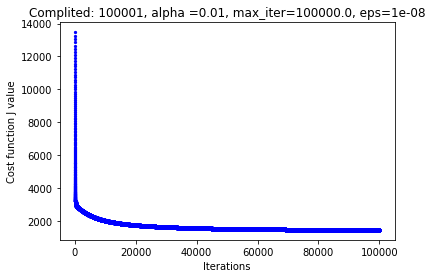

In [58]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
X, y = load_diabetes(return_X_y = True)
# print (np.isnan(X).any())
# X= np.nan_to_num(X)
 # 5 corresponds to 'RM' 
# X= X.reshape(-1,1) # make it 2d as for case of mutivariable
X_train, X_test, y_train, y_test=  X[:300],X[300:],y[:300], y[300:]
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
# print ('X_train= \n{}'.format (X_train[:5,:]))
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train, y_train)
lin_reg.draw_cost_changes()
print ('R2 Score =', lin_reg.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))
print ('Normal Score =',lin_reg.normal(X, y))